In [1]:
from functions import get_gz_array, get_coords_and_mask, calculate_delta_gs_triaxial, plot_colourmap_gz, calculate_internal_g, calculate_delta_gs_oblate, calculate_delta_gs_prolate
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

# lambda works 
# prolate/oblate work 
# get_coords works
# triaxial works with arrays too.


In [2]:
x, y, z, internal = get_coords_and_mask(region = (-6, 6, -6, 6), spacing=0.5, extra_coords=1, a=5, b=4, c=3)
#print(internal)
#print(z)

m, n, p = calculate_internal_g(x, y, z, 5, 4, 3, 1000)

print(p)

[[-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07]
 [-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07]
 [-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.1

In [3]:
g1, g2, g3 = calculate_delta_gs_triaxial(x, y, z, a=5, b=4, c=3, density=1000)
print(g3)

[[-3.68676643e-08 -4.17495438e-08 -4.71577251e-08 -5.30538621e-08
  -5.93517867e-08 -6.59075294e-08 -7.25144712e-08 -7.89070060e-08
  -8.47751387e-08 -8.97902946e-08 -9.36397371e-08 -9.60642904e-08
  -9.68924751e-08 -9.60642904e-08 -9.36397371e-08 -8.97902946e-08
  -8.47751387e-08 -7.89070060e-08 -7.25144712e-08 -6.59075294e-08
  -5.93517867e-08 -5.30538621e-08 -4.71577251e-08 -4.17495438e-08
  -3.68676643e-08]
 [-4.25313453e-08 -4.87846863e-08 -5.58549279e-08 -6.37257251e-08
  -7.23102689e-08 -8.14296709e-08 -9.07980893e-08 -1.00021810e-07
  -1.08618400e-07 -1.16058097e-07 -1.21823630e-07 -1.25478655e-07
  -1.26731231e-07 -1.25478655e-07 -1.21823630e-07 -1.16058097e-07
  -1.08618400e-07 -1.00021810e-07 -9.07980893e-08 -8.14296709e-08
  -7.23102689e-08 -6.37257251e-08 -5.58549279e-08 -4.87846863e-08
  -4.25313453e-08]
 [-4.91811492e-08 -5.72417481e-08 -6.65724815e-08 -7.72167906e-08
  -8.91172367e-08 -1.02070243e-07 -1.15687550e-07 -1.29379796e-07
  -1.42377499e-07 -1.53797594e-07 -1.6

In [4]:
xresults, yresults, zresults = get_gz_array(region = (-20, 20, -20, 20), spacing=1, extra_coords=1, a=5, b=4, c=3, density=1000, func=calculate_delta_gs_triaxial)

In [5]:
print(zresults)

[[-9.08365156e-10 -9.79087639e-10 -1.05505068e-09 -1.13634884e-09
  -1.22297639e-09 -1.31479689e-09 -1.41150917e-09 -1.51261138e-09
  -1.61736527e-09 -1.72476409e-09 -1.83350872e-09 -1.94199720e-09
  -2.04833378e-09 -2.15036268e-09 -2.24573088e-09 -2.33198100e-09
  -2.40667168e-09 -2.46751801e-09 -2.51253990e-09 -2.54020297e-09
  -2.54953500e-09 -2.54020297e-09 -2.51253990e-09 -2.46751801e-09
  -2.40667168e-09 -2.33198100e-09 -2.24573088e-09 -2.15036268e-09
  -2.04833378e-09 -1.94199720e-09 -1.83350872e-09 -1.72476409e-09
  -1.61736527e-09 -1.51261138e-09 -1.41150917e-09 -1.31479689e-09
  -1.22297639e-09 -1.13634884e-09 -1.05505068e-09 -9.79087639e-10
  -9.08365156e-10]
 [-9.79982593e-10 -1.06050871e-09 -1.14759092e-09 -1.24145367e-09
  -1.34221304e-09 -1.44983647e-09 -1.56409602e-09 -1.68451668e-09
  -1.81032209e-09 -1.94038231e-09 -2.07316949e-09 -2.20672976e-09
  -2.33868049e-09 -2.46624251e-09 -2.58631523e-09 -2.69559890e-09
  -2.79076205e-09 -2.86864449e-09 -2.92647784e-09 -2.9620

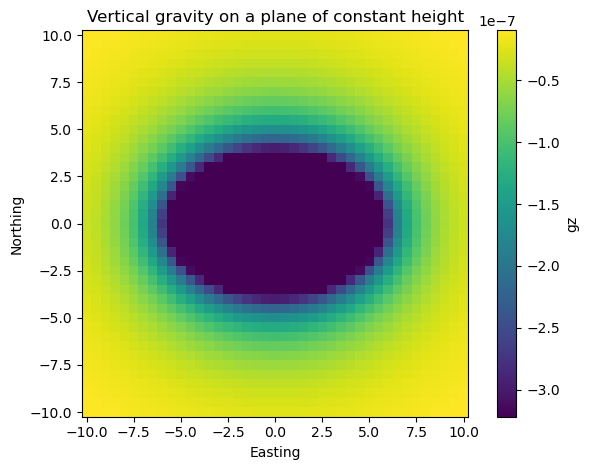

In [7]:
plot_colourmap_gz(func=calculate_delta_gs_prolate, spacing=0.5, region=(-10, 10, -10, 10), extra_coords=1, a=6, b=4, c=4, density=1000)